## Homework 2 (Due - Feb'17th) - practice Supervised (KNN) and Un-Supervised (Clustering):

Follow the steps below to:
    - Read `wine.csv` in the data folder.
    - We are going to use this dataset to practice Supervised (KNN) and Un-Supervised (Clustering)
    
### Supervised (KNN)

    - Split the data into Train and Test (30%) using random_state of 42 (so that we all get same results)
    - Using KNN, can you predict the Wine class in test
    - How Accurate is your prediction
    
### Un-Supervised (Clustering)
    - The First Column contains the Wine Category.  Don't use it in the models below.  We are going to treat it as unsupervized learning and compare the results to the Wine column.
    - Try `KMeans` where `n_clusters = 3` and compare the clusters to the `Wine` column.
    - Try `Hierarchical Clustering` and plot dendogram
    - Compare the results of `KMeans` with that of Wine Column.  Is Clustering identifying the Wine groups correctly? 

Note that the Wine group codes will not match between Clustering and Wine Category.  What we are looking for is does all the wines in the cluster fall into the same Wine Category).

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from seaborn import plt, color_palette
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn import feature_selection
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.preprocessing import scale
import sklearn.datasets as datasets
from sklearn.cluster import KMeans


df= pd.read_csv('/Users/bingrongwang/DAT_SF_12/data/wine.csv')
df.head(10)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [2]:
df.describe()



,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
feature_cols=[col for col in df.columns if col not in 'Wine']
x=df.ix[:,feature_cols]
print feature_cols

['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue', 'OD', 'Proline']


In [9]:
test_idx=np.random.uniform(0,1, len(df))<=0.3
train=df[test_idx==True]
test=df[test_idx==False]

feature_cols=[col for col in df.columns if col not in 'Wine']


In [10]:
results=[]
for n in range(1,42,2):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(train[feature_cols], train['Wine'])
    preds = clf.predict(test[feature_cols])
    accuracy = np.where(preds==test['Wine'], 1, 0).sum() / float(len(test))
    print "Neighbors: %d, Accuracy: %3f" % (n, accuracy)
 
    results.append([n, accuracy])
 
results = pd.DataFrame(results, columns=["n", "accuracy"])


Neighbors: 1, Accuracy: 0.666667
Neighbors: 3, Accuracy: 0.635659
Neighbors: 5, Accuracy: 0.674419
Neighbors: 7, Accuracy: 0.689922
Neighbors: 9, Accuracy: 0.666667
Neighbors: 11, Accuracy: 0.666667
Neighbors: 13, Accuracy: 0.674419
Neighbors: 15, Accuracy: 0.527132
Neighbors: 17, Accuracy: 0.736434
Neighbors: 19, Accuracy: 0.736434
Neighbors: 21, Accuracy: 0.728682
Neighbors: 23, Accuracy: 0.736434
Neighbors: 25, Accuracy: 0.713178
Neighbors: 27, Accuracy: 0.728682
Neighbors: 29, Accuracy: 0.720930
Neighbors: 31, Accuracy: 0.720930
Neighbors: 33, Accuracy: 0.682171
Neighbors: 35, Accuracy: 0.682171
Neighbors: 37, Accuracy: 0.689922
Neighbors: 39, Accuracy: 0.697674
Neighbors: 41, Accuracy: 0.697674


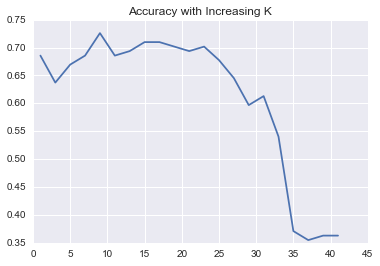

In [27]:
import pylab as pl
pl.plot(results.n, results.accuracy)
pl.title("Accuracy with Increasing K")
pl.show()

In [28]:

df1= df.drop('Wine',1)
df1.head(5)
 

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [15]:
feature_cols = [col for col in df.columns if col != 'Wine']

In [16]:
X=df[feature_cols]

In [19]:
#kmeans cluster
kmeans = KMeans(n_clusters=3, random_state=1)
Y_hat_kmeans=kmeans.fit(X).labels_

In [21]:
Y_hat_kmeans

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0,
       0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1], dtype=int32)

In [23]:
y=df['Wine']

In [24]:
print y.values

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [25]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [26]:
kmeans_scaled = KMeans(n_clusters=3, init='random', max_iter = 300, random_state=1)
Y_hat_kmeans_scaled = kmeans.fit(X_scaled).labels_

In [27]:
Y_hat_kmeans_scaled

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [30]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

In [13]:
X = df.iloc[:, :3].values

In [29]:

distx = squareform(pdist(X_scaled, metric='euclidean'))
distx


array([[ 0.        ,  3.49753522,  3.02660794, ...,  6.4909413 ,
         6.07878091,  7.18442107],
       [ 3.49753522,  0.        ,  4.1429119 , ...,  6.39689969,
         6.09492714,  7.36771922],
       [ 3.02660794,  4.1429119 ,  0.        , ...,  6.25367723,
         5.85179331,  6.35388503],
       ..., 
       [ 6.4909413 ,  6.39689969,  6.25367723, ...,  0.        ,
         1.82621785,  3.39251526],
       [ 6.07878091,  6.09492714,  5.85179331, ...,  1.82621785,
         0.        ,  3.32427633],
       [ 7.18442107,  7.36771922,  6.35388503, ...,  3.39251526,
         3.32427633,  0.        ]])

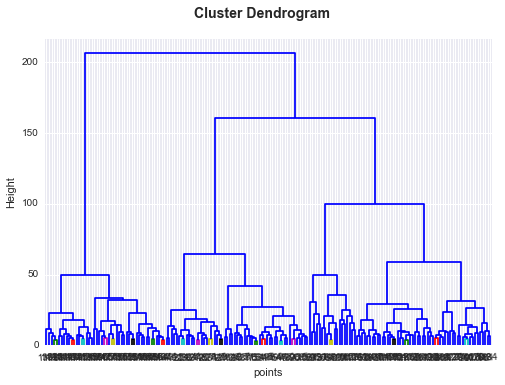

In [31]:
R = dendrogram(linkage(distx, method='ward'), color_threshold=5)

plt.xlabel('points')
plt.ylabel('Height')
plt.suptitle('Cluster Dendrogram', fontweight='bold', fontsize=14);

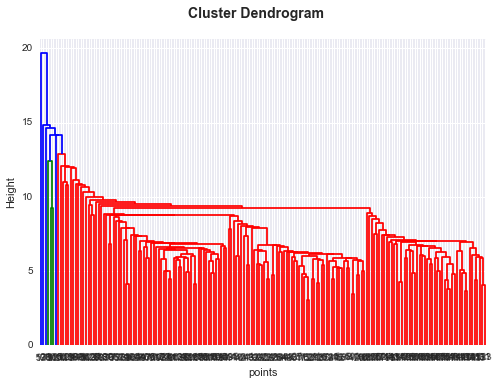

In [32]:
R = dendrogram(linkage(distx, method='single'))

plt.xlabel('points')
plt.ylabel('Height')
plt.suptitle('Cluster Dendrogram', fontweight='bold', fontsize=14);